In [1]:
# Import Python Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Display all columns when printing DataFrame
pd.set_option('display.max_columns', 15)

In [3]:
# Import the dataset
df = pd.read_csv('customer_data.csv')

In [4]:
# Display the shape of the DataFrame
df.shape

(2000, 15)

In [5]:
# Display the first 5 rows of the DataFrame
df.head()

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue
0,0,02/19/16,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,1,80.00,109.000000,80,109
1,1,02/20/16,2016,February,29,F,United States,Washington,Clothing,Gloves,2,24.50,28.500000,49,57
2,2,02/27/16,2016,February,29,F,United States,Washington,Accessories,Tires and Tubes,3,3.67,5.000000,11,15
3,3,03/12/16,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,2,87.50,116.500000,175,233
4,4,03/12/16,2016,March,29,F,United States,Washington,Accessories,Tires and Tubes,3,35.00,41.666667,105,125


In [6]:
# Display columns and their types
df.dtypes

index                 int64
Date                 object
Year                  int64
Month                object
Customer Age          int64
Customer Gender      object
Country              object
State                object
Product Category     object
Sub Category         object
Quantity              int64
Unit Cost           float64
Unit Price          float64
Cost                  int64
Revenue               int64
dtype: object

# Data Cleaning

In [7]:
# Drop the 'index' column
df.drop(columns=['index'],axis=1,inplace=True)

In [8]:
# Cast 'Year' as type string and handle potential floating point issues
df['Year']=df['Year'].astype(str).str.split('.').str[0]

In [9]:
# Convert 'Date' from object to datetime
df['Date']=pd.to_datetime(df['Date'])

In [10]:
# Define age groups
age_groups = {
    (0, 18): "0-18",
    (19, 30): "19-30",
    (31, 40): "31-40",
    (41, 50): "41-50",
    (51, 60): "51-60",
    (61, 70): "61-70",
    (71, float("inf")): "71 & above"
}

In [11]:
# Create a new column for age groups based on 'Customer Age'
df['Age Group']=pd.cut(df['Customer Age'],bins=[0,18,30,40,50,60,70,float('inf')],labels=["0-18","19-30","31-40","41-50","51-60","61-70","71 & above"])

In [12]:
# Calculate profit margin. Create a new column in the DF by name margin. Margin is computed as Revenue-Cost
df['Margin']=df['Revenue']-df['Cost']

In [13]:
# Drop rows with null values
df.dropna(inplace=True)

# Data Exploration

In [14]:
# Examine the distribution of numerical variables in a tabular form
df.describe()

,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Margin
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,35.739500,1.998500,367.149905,395.876667,606.815500,656.233500,49.418000
std,10.075684,0.809213,517.772561,530.060841,730.756584,753.643244,152.463999
min,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,-828.000000
25%,28.000000,1.000000,44.000000,52.500000,84.000000,98.750000,4.000000
50%,34.000000,2.000000,163.330000,188.500000,270.000000,321.500000,22.000000
75%,43.000000,3.000000,455.000000,518.375000,782.250000,922.250000,80.000000
max,71.000000,3.000000,2443.000000,3455.000000,2443.000000,3681.000000,1297.000000


### Demographic Analysis

In [15]:
# Age Distribution
# Define the order for age groups
age_order = ["0-18", "19-30", "31-40", "41-50", "51-60", "61-70", "71 & above"]

In [16]:
# Create a sorting column to maintain order
df['Age Group'] = pd.Categorical(df['Age Group'], categories=age_order, ordered=True)

In [17]:
# Sort the DataFrame based on the sorting column
df.sort_values('Age Group', inplace=True)

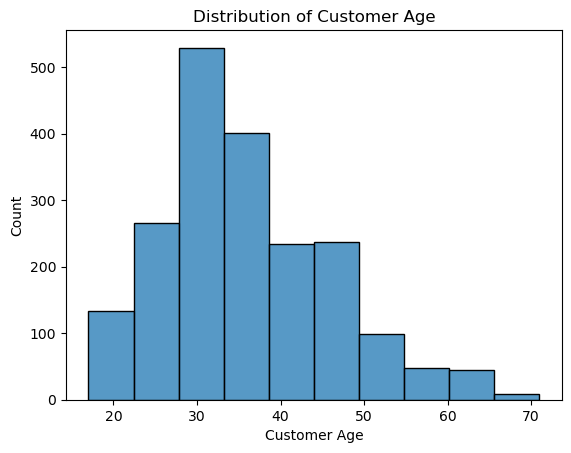

In [18]:
# Age Distribution PLot
sns.histplot(df['Customer Age'], kde=False, bins=10)
plt.title("Distribution of Customer Age")
plt.xlabel("Customer Age")
plt.ylabel("Count")
plt.show()

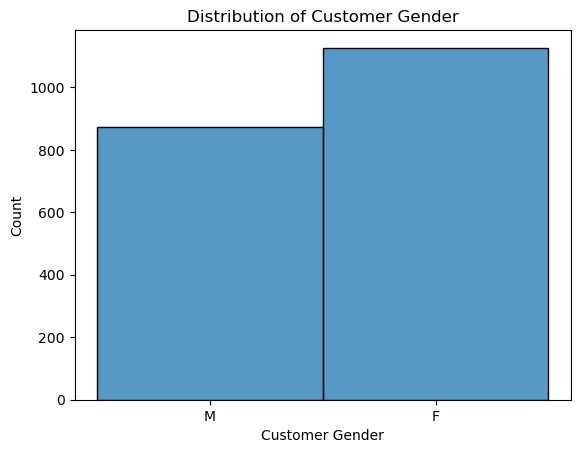

In [19]:
# Gender Distribution PLot
sns.histplot(df['Customer Gender'], kde=False)
plt.title("Distribution of Customer Gender")
plt.xlabel("Customer Gender")
plt.ylabel("Count")
plt.show()

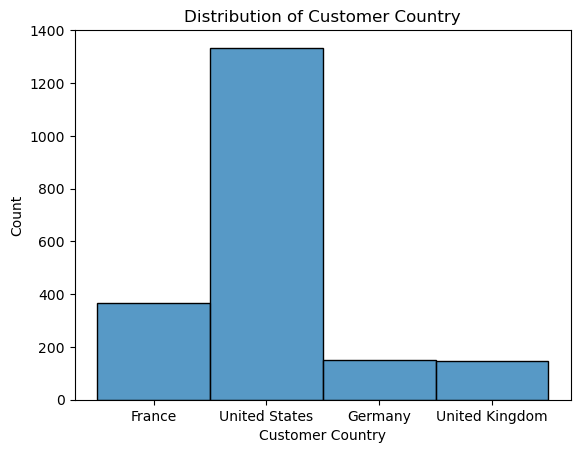

In [20]:
# Country Distribution PLot
sns.histplot(df['Country'], kde=False)
plt.title("Distribution of Customer Country")
plt.xlabel("Customer Country")
plt.ylabel("Count")
plt.show()

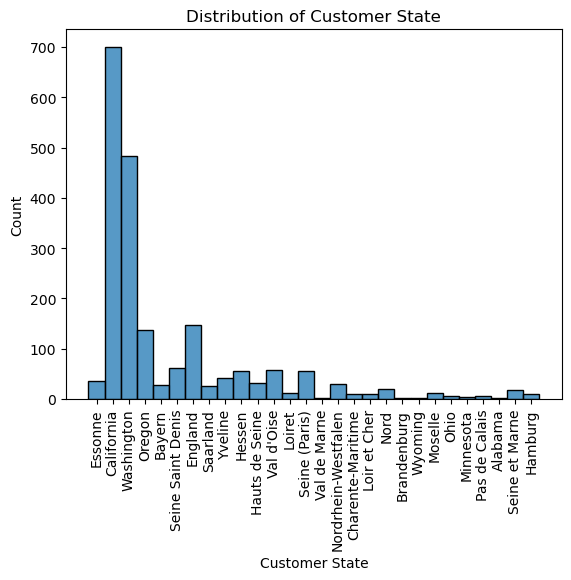

In [21]:
# State Distribution PLot
sns.histplot(df['State'], kde=False)
plt.title("Distribution of Customer State")
plt.xlabel("Customer State")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

### Purchase Behavior Analysis

In [22]:
# Product Category Preferences by Age Group
# Group the DataFrame by 'Age Group' and 'Product Category'
age_product_group = df.groupby(['Age Group', 'Product Category']).size().unstack(fill_value=0)

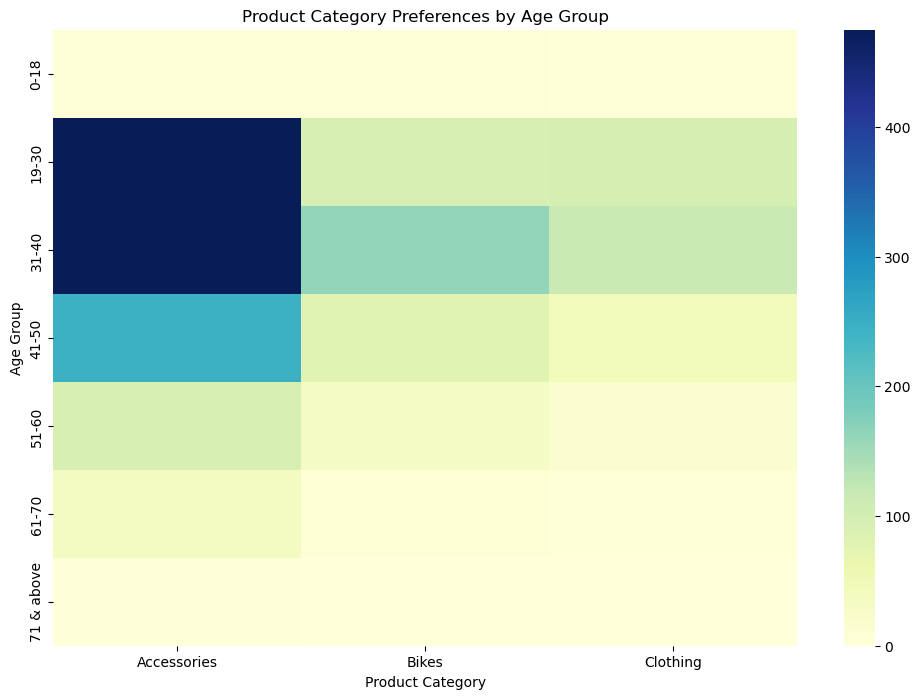

In [23]:
# Create heatmap for product category preferences by age group
# Use annot=False, cmap="YlGnBu", cbar=True
plt.figure(figsize=(12, 8))
sns.heatmap(age_product_group, annot=False, cmap="YlGnBu", cbar=True)
plt.xlabel("Product Category")
plt.ylabel("Age Group")
plt.title("Product Category Preferences by Age Group")
plt.show()

In [24]:
# Subcategory Preferences by Age Group
# Group the DataFrame by 'Age Group' and 'Sub Category'
age_subcat_group = df.groupby(['Age Group', 'Sub Category']).size().unstack(fill_value=0)

<Figure size 1200x1000 with 0 Axes>

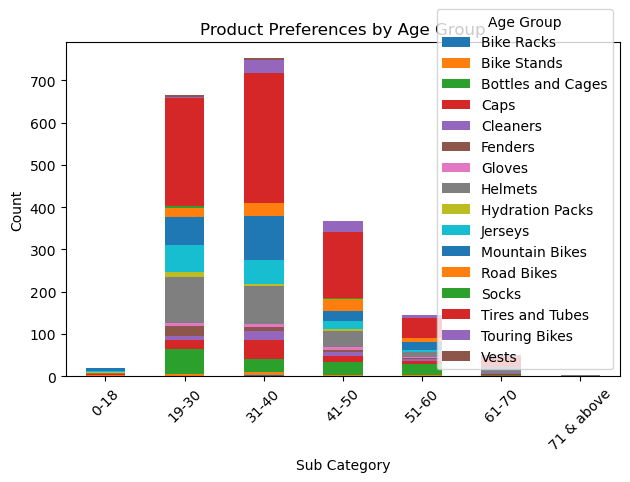

In [25]:
# Create bar chart for subcategory preferences by age group
plt.figure(figsize=(12, 10))
age_subcat_group.plot(kind='bar', stacked=True)
plt.title("Product Preferences by Age Group")
plt.xlabel("Sub Category")
plt.ylabel("Count")
plt.legend(title="Age Group")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Financial Metrics Analysis

In [26]:
# Compute the average unit price and quantity purchased by different age groups and create a dataframe
age_group_metrics = df.groupby('Age Group').agg({'Unit Price': 'mean', 'Quantity': 'mean'}).reset_index()

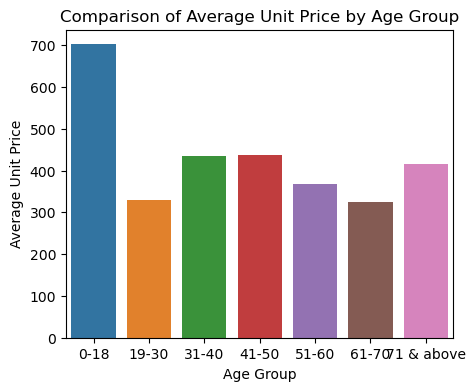

In [27]:
# Create bar chart for Average Unit Price by Age Group
plt.figure(figsize=(5,4))
sns.barplot(x='Age Group', y='Unit Price', data=age_group_metrics)
plt.title("Comparison of Average Unit Price by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Unit Price")
plt.show()

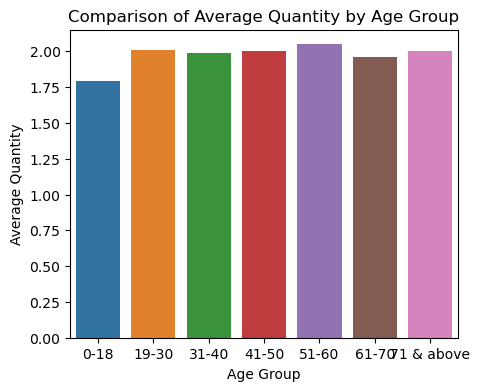

In [28]:
# Create bar chart for Average Quantity by Age Group
plt.figure(figsize=(5,4))
sns.barplot(x='Age Group', y='Quantity', data=age_group_metrics)
plt.title("Comparison of Average Quantity by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Quantity")
plt.show()

In [29]:
# Distribution of Revenue by Age
# Group total revenue by customer age
revenue_by_age = df.groupby('Customer Age')['Revenue'].sum()

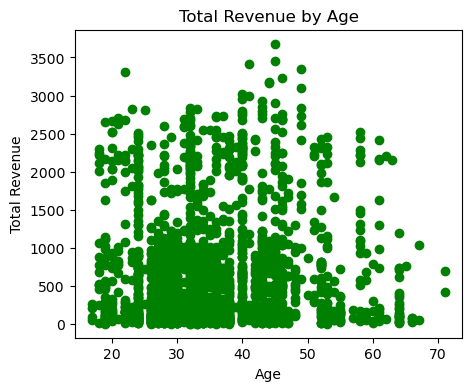

In [30]:
# Plot a Scatter Plot - total revenue by customer age
plt.figure(figsize=(5,4))
plt.scatter(df['Customer Age'], df['Revenue'],color='g')
plt.xlabel('Age')
plt.ylabel("Total Revenue")
plt.title('Total Revenue by Age')
plt.show()

### Profitability Assessment

In [31]:
# Calculate the average margin by product category and subcategory
profitability_metrics = df.groupby(['Product Category', 'Sub Category']).agg({'Margin': 'mean'}).reset_index()

In [32]:
# Sort the DataFrame by margin and select the top 10 products
top_10_margin_products = profitability_metrics.sort_values(by='Margin', ascending=False).head(10)

<Figure size 400x400 with 0 Axes>

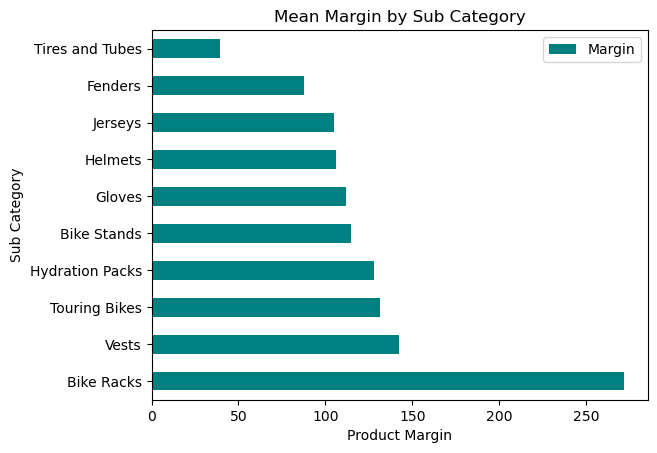

In [33]:
# Create horizontal bar chart for mean margin by subcategory for top 10 products
plt.figure(figsize=(4,4))
top_10_margin_products.plot(kind='barh', x='Sub Category', y='Margin', color='teal')
plt.title("Mean Margin by Sub Category")
plt.xlabel("Product Margin")
plt.ylabel("Sub Category")
plt.show()

### Temporal Trends

In [34]:
# Revenue Trend
# Sort DataFrame by date
df.sort_values('Date', inplace=True)

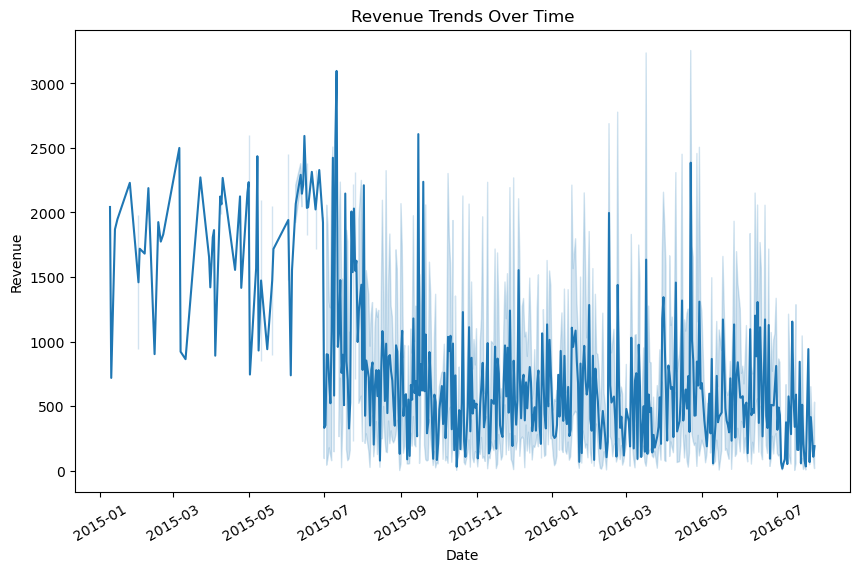

In [35]:
# Plot revenue trend over time.
plt.figure(figsize=(10,6))
sns.lineplot(x='Date', y='Revenue', data=df)
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.xticks(rotation=30)
plt.title("Revenue Trends Over Time")
plt.show()

In [36]:
# Monthly Revenue Comparison by Year
# Filter data by year
year1 = df[df["Year"] == "2015"]
year2 = df[df["Year"] == "2016"]
# Define the order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Group data by month and sum revenue
monthly_rev2015 = year1.groupby('Month')['Revenue'].sum().reindex(months_order).reset_index()
monthly_rev2016 = year2.groupby('Month')['Revenue'].sum().reindex(months_order).reset_index()

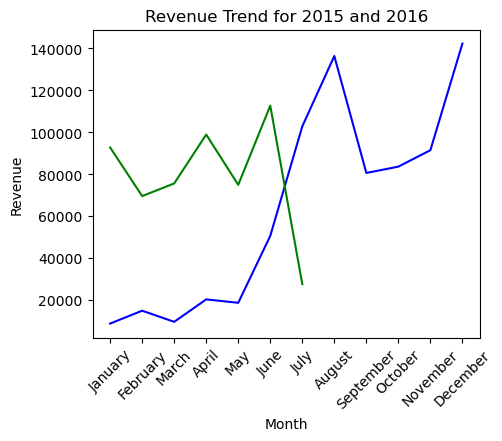

In [37]:
# Plot 2 separate line plots to compare monthly revenue for 2015 and 2016
plt.figure(figsize=(5,4))
plt.plot(monthly_rev2015['Month'], monthly_rev2015['Revenue'], label='2015', color='blue')
plt.plot(monthly_rev2016['Month'], monthly_rev2016['Revenue'], label='2016', color='green')
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.title("Revenue Trend for 2015 and 2016")
plt.xticks(rotation=45)
plt.show()

### Geographic Analysis

In [38]:
# Average Revenue generated by Country
labels = ['France', 'Germany', 'United Kingdom', 'United States']
sizes = df.groupby("Country")["Revenue"].mean()

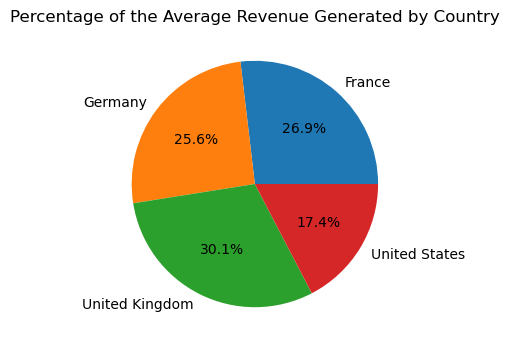

In [39]:
# Create pie chart for average revenue generated by country. Set autopct='%1.1f%%'
plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Percentage of the Average Revenue Generated by Country")
plt.show()

In [40]:
# Average Unit Price per Product by Country
# Group data by country and product category to calculate mean unit price
avg_unit_price_by_country = df.groupby(['Country', 'Product Category'])['Unit Price'].mean().unstack()

<Figure size 500x500 with 0 Axes>

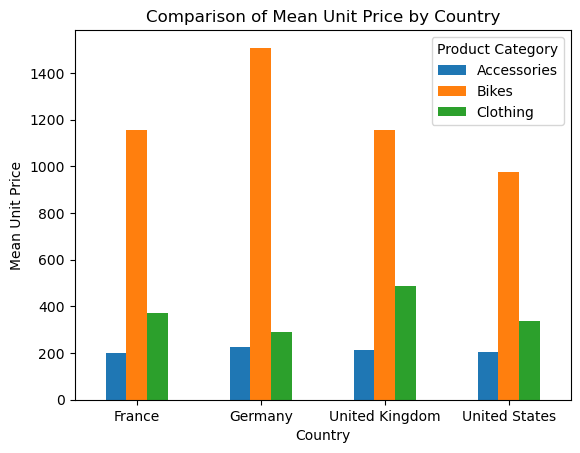

In [41]:
# Create bar chart for average unit price per product by country
plt.figure(figsize=(5,5))
avg_unit_price_by_country.plot(kind='bar')
plt.xlabel("Country")
plt.ylabel("Mean Unit Price")
plt.title("Comparison of Mean Unit Price by Country")
plt.xticks(rotation=0)
plt.show()